<a href="https://colab.research.google.com/github/SophiaHe/twosigma_stockprice/blob/main/StockSelection_PortfolioManagment_colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
!ls "./gdrive/MyDrive/Colab Datasets/twosigma_data"

'CNN prototype model.png'   modeling_results	      news_train_pre2013.csv
 market_train_full.csv	    news_train_from2013.csv


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize']=20,10
from keras.models import Sequential
from keras.layers import LSTM,Dropout,Dense
from sklearn.preprocessing import MinMaxScaler
import math


In [4]:
path = "./gdrive/MyDrive/Colab Datasets/twosigma_data/"

df = pd.read_csv(path+"market_train_full.csv")
df = df.loc[df['assetCode'] == "APA.N"]

In [5]:
df.head()

,Unnamed: 0,time,assetCode,assetName,volume,close,open,returnsClosePrevRaw1,returnsOpenPrevRaw1,returnsClosePrevMktres1,returnsOpenPrevMktres1,returnsClosePrevRaw10,returnsOpenPrevRaw10,returnsClosePrevMktres10,returnsOpenPrevMktres10,returnsOpenNextMktres10,universe
92,92,2007-02-01 22:00:00+00:00,APA.N,Apache Corp,6339700.0,71.57,72.69,-0.019186,0.014232,NaN,NaN,0.090175,0.098700,NaN,NaN,-0.001529,1.0
1510,1510,2007-02-02 22:00:00+00:00,APA.N,Apache Corp,6007500.0,70.71,70.28,-0.012016,-0.033154,-0.013038,-0.034582,0.041231,0.058753,NaN,NaN,-0.022635,1.0
2933,2933,2007-02-05 22:00:00+00:00,APA.N,Apache Corp,3207300.0,69.62,70.96,-0.015415,0.009676,-0.014746,0.009628,0.025180,0.035912,NaN,NaN,-0.007155,1.0
4362,4362,2007-02-06 22:00:00+00:00,APA.N,Apache Corp,3301500.0,69.90,70.07,0.004022,-0.012542,0.003227,-0.012447,-0.005548,0.026516,NaN,NaN,0.007232,1.0
5793,5793,2007-02-07 22:00:00+00:00,APA.N,Apache Corp,2687600.0,69.20,69.72,-0.010014,-0.004995,-0.011590,-0.005145,-0.017743,0.000718,NaN,NaN,0.035662,1.0


In [ ]:
#Create a new dataframe with only the 'Close' column
data = df.filter(['close'])#Converting the dataframe to a numpy array
dataset = data.values#Get /Compute the number of rows to train the model on
training_data_len = math.ceil( len(dataset) *.8) 
dataset[0:4]

array([[71.57],
       [70.71],
       [69.62],
       [69.9 ]])

In [ ]:
#Scale the all of the data to be values between 0 and 1 
scaler = MinMaxScaler(feature_range=(0, 1)) 
scaled_data = scaler.fit_transform(dataset)
print(scaled_data[0:4])

train_data = dataset[0:training_data_len  , : ]#Split the data into x_train and y_train data sets
train_data = scaler.fit_transform(train_data)
print(train_data[0:4])

[[0.33081302]
 [0.32316314]
 [0.31346735]
 [0.31595801]]
[[0.21159086]
 [0.20257808]
 [0.19115489]
 [0.19408929]]


In [ ]:
#Create the scaled training data set 
scaler = MinMaxScaler(feature_range=(0, 1)) 
train_data = dataset[0:training_data_len  , : ]#Split the data into x_train and y_train data sets
train_data = scaler.fit_transform(train_data)
x_train=[]
y_train = []
for i in range(60,len(train_data)):
    x_train.append(train_data[i-60:i,0])
    y_train.append(train_data[i,0])
#Convert x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)
#Reshape the data into the shape accepted by the LSTM
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

In [ ]:
#Build the LSTM network model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dense(units=25))
model.add(Dense(units=1))
#Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
model = Sequential()
model.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
model.add(LSTM(units = 50))
model.add(Dropout(0.2))
model.add(Dense(units = 1))
model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
#Train the model
#model.fit(x_train, y_train, batch_size=1, epochs=1)
model.fit(x_train, y_train, epochs = 15, batch_size = 32)

Epoch 1/15
61/61 [==============================] - 3s 8ms/step - loss: 0.0509
Epoch 2/15
61/61 [==============================] - 0s 7ms/step - loss: 0.0025
Epoch 3/15
61/61 [==============================] - 0s 7ms/step - loss: 0.0022
Epoch 4/15
61/61 [==============================] - 0s 7ms/step - loss: 0.0021
Epoch 5/15
61/61 [==============================] - 0s 7ms/step - loss: 0.0016
Epoch 6/15
61/61 [==============================] - 0s 7ms/step - loss: 0.0018
Epoch 7/15
61/61 [==============================] - 0s 7ms/step - loss: 0.0017
Epoch 8/15
61/61 [==============================] - 0s 7ms/step - loss: 0.0015
Epoch 9/15
61/61 [==============================] - 0s 7ms/step - loss: 0.0014
Epoch 10/15
61/61 [==============================] - 0s 7ms/step - loss: 0.0013
Epoch 11/15
61/61 [==============================] - 0s 7ms/step - loss: 0.0013
Epoch 12/15
61/61 [==============================] - 0s 7ms/step - loss: 0.0011
Epoch 13/15
61/61 [==============================

In [ ]:
#Test data set
scaler = MinMaxScaler(feature_range=(0, 1)) 
test_data = dataset[training_data_len - 60: , : ]#Split the data into x_train and y_train data sets
test_data = scaler.fit_transform(test_data)

#test_data = scaled_data[training_data_len - 60: , : ]#Create the x_test and y_test data sets
x_test = []
y_test =  dataset[training_data_len : , : ] #Get all of the rows from index 1603 to the rest and all of the columns (in this case it's only column 'Close'), so 2003 - 1603 = 400 rows of data
for i in range(60,len(test_data)):
    x_test.append(test_data[i-60:i,0])
#Convert x_test to a numpy array 
x_test = np.array(x_test)
#Reshape the data into the shape accepted by the LSTM
x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))
  

In [ ]:
#Getting the models predicted price values
predictions = model.predict(x_test) 
predictions = scaler.inverse_transform(predictions)#Undo scaling
predictions[0:4]

array([[59.19488 ],
       [59.76243 ],
       [59.652554],
       [59.374928]], dtype=float32)

In [ ]:
#Calculate/Get the value of RMSE
rmse=np.sqrt(np.mean(((predictions- y_test)**2)))
rmse

1.8864788157552579

In [ ]:
test_data = scaled_data[training_data_len - 60: , : ]
print(pd.DataFrame(dataset[training_data_len - 60: ]).rename(columns = {0:"close"}))
df[["time","close"]][training_data_len - 60: ]


     close
0    74.40
1    72.67
2    73.23
3    72.85
4    72.93
..     ...
554  66.40
555  66.34
556  64.59
557  63.87
558  63.47

[559 rows x 1 columns]


,time,close
3096455,2014-10-14 22:00:00+00:00,74.40
3097780,2014-10-15 22:00:00+00:00,72.67
3099109,2014-10-16 22:00:00+00:00,73.23
3100447,2014-10-17 22:00:00+00:00,72.85
3101784,2014-10-20 22:00:00+00:00,72.93
...,...,...
4063943,2016-12-23 22:00:00+00:00,66.40
4065782,2016-12-27 22:00:00+00:00,66.34
4067617,2016-12-28 22:00:00+00:00,64.59
4069444,2016-12-29 22:00:00+00:00,63.87


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


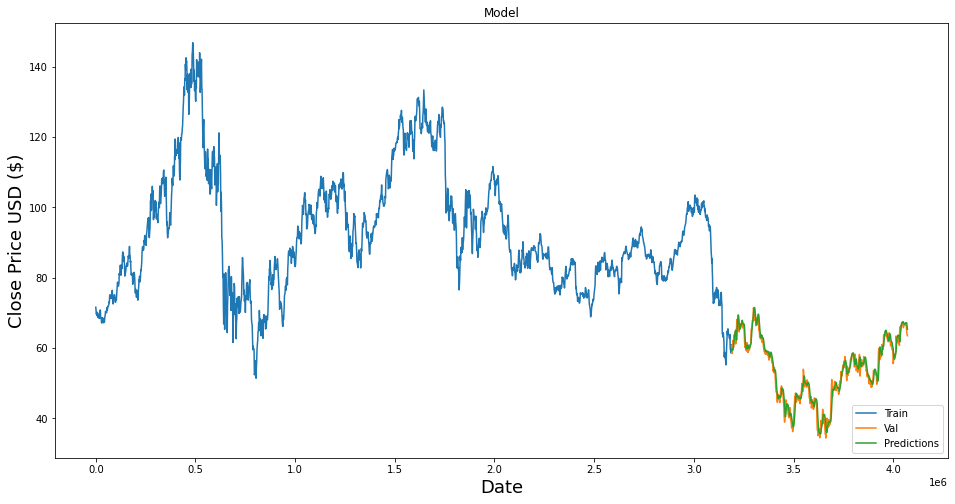

In [ ]:
#Plot/Create the data for the graph
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions#Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['close'])
plt.plot(valid[['close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

### LSTM

In [ ]:
#from nsepy import get_history as gh
import datetime as dt
from matplotlib import pyplot as plt
from sklearn import model_selection
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [ ]:
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(dataset)
X_train = []
y_train = []
for i in range(60, len(training_set_scaled)):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0]) 
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))


In [ ]:
import pandas_datareader as web
df = web.DataReader('AAPL', data_source='yahoo', start='2012-01-01', end='2019-12-17') 
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,14.732143,14.607143,14.621429,14.686786,302220800.0,12.629209
2012-01-04,14.810000,14.617143,14.642857,14.765714,260022000.0,12.697079
2012-01-05,14.948214,14.738214,14.819643,14.929643,271269600.0,12.838044
2012-01-06,15.098214,14.972143,14.991786,15.085714,318292800.0,12.972249
2012-01-09,15.276786,15.048214,15.196429,15.061786,394024400.0,12.951672


In [ ]:
regressor = Sequential()
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))
regressor.add(Dense(units = 1))
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')
regressor.fit(X_train, y_train, epochs = 15, batch_size = 32)

In [ ]:
!pip install nsepy
from nsepy import get_history as gh

  Created wheel for nsepy: filename=nsepy-0.8-cp37-none-any.whl size=36083 sha256=7c4192dfd95bd98c1a955a216f4ce2a481bf86b4634232344087a0cb46bfc1ac
  Stored in directory: /root/.cache/pip/wheels/05/2c/72/5324e267426eea65dec0c21a12a48b15887c0cf686c7a8fe11
Successfully built nsepy


In [ ]:
start = dt.datetime(2013,1,1)
end = dt.datetime(2018,12,31)
stk_data = gh(symbol='SBIN',start=start,end=end)
stk_data.shape

KeyboardInterrupt: ignored

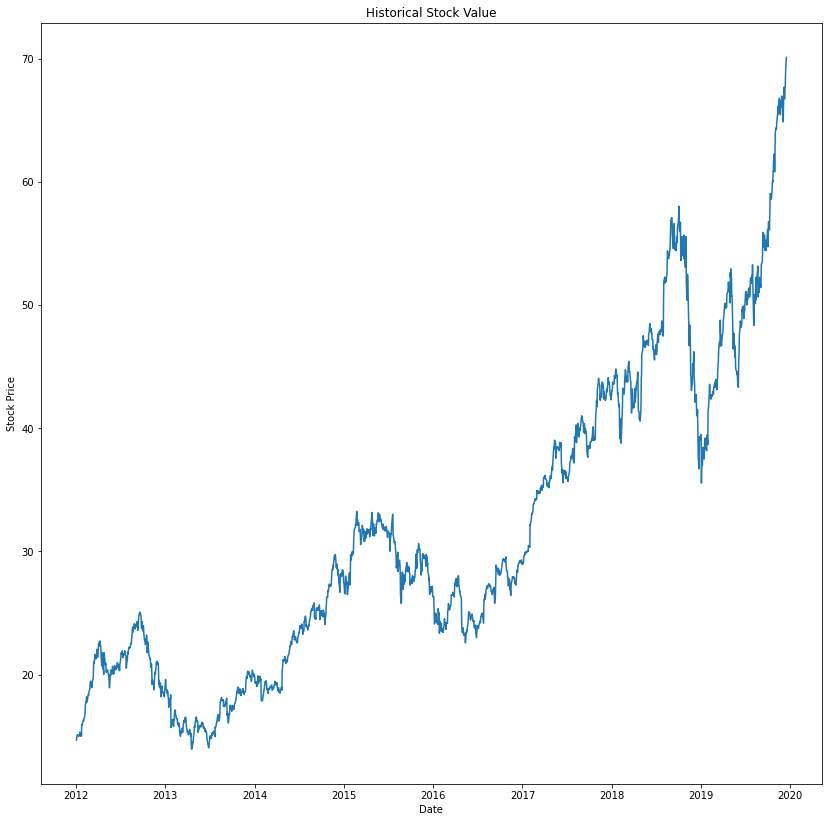

                 High        Low       Open      Close       Volume  Adj Close
Date                                                                          
2012-01-03  14.732143  14.607143  14.621429  14.686786  302220800.0  12.629209
2012-01-04  14.810000  14.617143  14.642857  14.765714  260022000.0  12.697079
2012-01-05  14.948214  14.738214  14.819643  14.929643  271269600.0  12.838044
2012-01-06  15.098214  14.972143  14.991786  15.085714  318292800.0  12.972249
2012-01-09  15.276786  15.048214  15.196429  15.061786  394024400.0  12.951672


In [ ]:
#Setting start and end dates and fetching the historical data
start = dt.datetime(2012,1,1)
end = dt.datetime(2019,12,17)
stk_data = web.DataReader('AAPL', data_source='yahoo', start='2012-01-01', end='2019-12-17') 

#Visualizing the fetched data
plt.figure(figsize=(14,14))
plt.plot(stk_data['Close'])
plt.title('Historical Stock Value')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.show()

print(stk_data.head())

In [ ]:
#Data Preprocessing
stk_data['Date'] = stk_data.index
data2 = pd.DataFrame(columns = ['Date', 'Open', 'High', 'Low', 'Close'])
data2['Date'] = stk_data['Date']
data2['Open'] = stk_data['Open']
data2['High'] = stk_data['High']
data2['Low'] = stk_data['Low']
data2['Close'] = stk_data['Close']
train_set = data2.iloc[:, 1:2].values
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(train_set)
len(training_set_scaled)

2003

In [ ]:
X_train = []
y_train = []
for i in range(60, 2003):
  X_train.append(training_set_scaled[i-60:i, 0])
  y_train.append(training_set_scaled[i, 0]) 
  X_train, y_train = np.array(X_train), np.array(y_train)
  X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

AttributeError: ignored

In [ ]:
#Defining the LSTM Recurrent Model
regressor = Sequential()
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))
regressor.add(Dense(units = 1))

#Compiling and fitting the model
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')
regressor.fit(X_train, y_train, epochs = 15, batch_size = 32)


#Fetching the test data and preprocessing
testdataframe = gh(symbol='SBIN',start=dt.datetime(2019,1,1),end=dt.datetime(2019,9,18))
testdataframe['Date'] = testdataframe.index
testdata = pd.DataFrame(columns = ['Date', 'Open', 'High', 'Low', 'Close'])
testdata['Date'] = testdataframe['Date']
testdata['Open'] = testdataframe['Open']
testdata['High'] = testdataframe['High']
testdata['Low'] = testdataframe['Low']
testdata['Close'] = testdataframe['Close']
real_stock_price = testdata.iloc[:, 1:2].values
dataset_total = pd.concat((data2['Open'], testdata['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(testdata) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 235):
  X_test.append(inputs[i-60:i, 0])
  X_test = np.array(X_test)
  X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

#Making predictions on the test data
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

#Visualizing the prediction
plt.figure(figsize=(20,10))
plt.plot(real_stock_price, color = 'green', label = 'SBI Stock Price')
plt.plot(predicted_stock_price, color = 'red', label = 'Predicted SBI Stock Price')
plt.title('SBI Stock Price Prediction')
plt.xlabel('Trading Day')
plt.ylabel('SBI Stock Price')
plt.legend()
plt.show()

### **XGBoost**

In [ ]:
!pip install shap
import shap

In [ ]:
from google.colab import drive

drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [7]:
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
import seaborn as sns

import xgboost as xgboost
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import ParameterGrid
from sklearn.metrics import mean_squared_error
import math

In [ ]:
path = "./gdrive/MyDrive/Colab Datasets/twosigma_data/"

df = pd.read_csv(path+"market_train_full.csv")
df['time'] = pd.to_datetime(df['time']).dt.date
# .dt.date.astype('datetime64') 
#df['time'] = datetime.strptime(df['time'], "%Y-%m-%d")
df['time'].head()

0    2007-02-01
1    2007-02-01
2    2007-02-01
3    2007-02-01
4    2007-02-01
Name: time, dtype: object

In [ ]:
#X = df.drop(['Unnamed: 0','time','assetCode','assetName','returnsOpenNextMktres10'], axis=1)
#X['universe'] = X['universe'].astype(int)
#y = df['returnsOpenNextMktres10']
#y[y > 0] = 1
#y[y < 0] = 1


# time series split: train & test datasets
year_list = df['time'].unique().tolist()
splits = {'train': [],'validate':[], 'test': []}

train_yr = year_list[0:round(len(year_list)*0.6)]
validation_yr = year_list[round(len(year_list)*0.6):round(len(year_list)*0.9)]
test_yr = year_list[round(len(year_list)*0.9):]

splits['train'].append(df.loc[df.time.isin(train_yr), :])
splits['validate'].append(df.loc[df.time.isin(validation_yr), :])
splits['test'].append(df.loc[df.time.isin(test_yr), :])

print(df['time'].unique().min())
print(df['time'].unique().max())
print(len(year_list))

print("training date min: ",splits['train'][0]['time'].min())
print("training date max: ",splits['train'][0]['time'].max())
print("validate date min: ",splits['validate'][0]['time'].min())
print("validate date max: ",splits['validate'][0]['time'].max())
print("testing date min: ",splits['test'][0]['time'].min())
print("testing date max: ",splits['test'][0]['time'].max())

X_train = splits['train'][0].drop(['Unnamed: 0','time','assetCode','assetName','returnsOpenNextMktres10'], axis=1)
X_train['universe'] = X_train['universe'].astype(int)
y_train = splits['train'][0]['returnsOpenNextMktres10']

X_validate = splits['validate'][0].drop(['Unnamed: 0','time','assetCode','assetName','returnsOpenNextMktres10'], axis=1)
X_validate['universe'] = X_validate['universe'].astype(int)
y_validate = splits['validate'][0]['returnsOpenNextMktres10']

X_test = splits['test'][0].drop(['Unnamed: 0','time','assetCode','assetName','returnsOpenNextMktres10'], axis=1)
X_test['universe'] = X_test['universe'].astype(int)
y_test = splits['test'][0]['returnsOpenNextMktres10']

2007-02-01
2016-12-30
2498
training date min:  2007-02-01
training date max:  2013-01-14
validate date min:  2013-01-15
validate date max:  2016-01-05
testing date min:  2016-01-06
testing date max:  2016-12-30


In [ ]:
# for idx, yr in enumerate(year_list[:-1]):
#     train_yr = year_list[:idx+1]
#     test_yr = [year_list[idx+1]]
#     #print('TRAIN: ', train_yr, 'TEST: ',test_yr)
#     #print(data.loc[data['time'].isin(train_yr), :].head())
#     splits['train'].append(data.loc[data.time.isin(train_yr), :])
#     splits['validate'].append(data.loc[data.time.isin(test_yr), :])
#     splits['test'].append(data.loc[data.time.isin(test_yr), :])


# define data_dmatrix
data_dmatrix = xgboost.DMatrix(data=X_train,label=y_train)

In [ ]:
X_train.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2369939 entries, 0 to 2369938
Data columns (total 12 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   volume                    float64
 1   close                     float64
 2   open                      float64
 3   returnsClosePrevRaw1      float64
 4   returnsOpenPrevRaw1       float64
 5   returnsClosePrevMktres1   float64
 6   returnsOpenPrevMktres1    float64
 7   returnsClosePrevRaw10     float64
 8   returnsOpenPrevRaw10      float64
 9   returnsClosePrevMktres10  float64
 10  returnsOpenPrevMktres10   float64
 11  universe                  int64  
dtypes: float64(11), int64(1)
memory usage: 235.1 MB


In [ ]:
### hyperparameters
hyperparas_xgb = {"objective": ['reg:squarederror'], 
                  "n_estimators": [50, 100], 
                  "learning_rate":[0.5,1],
                  "max_depth": [3, 6], 
                  "colsample_bylevel": [0.8, 1]}
hyperparas_xgb_list = list(ParameterGrid(hyperparas_xgb))

In [ ]:
hyperparameters_list = []
for hyperpara in hyperparas_xgb_list:
    #print("hyperparamaters: " + str(hyperpara) + "\n")
    hyperparameters_list.append(str(hyperpara))
hyperparameters_list

["{'colsample_bylevel': 0.8, 'learning_rate': 0.5, 'max_depth': 3, 'n_estimators': 50, 'objective': 'reg:squarederror'}",
 "{'colsample_bylevel': 0.8, 'learning_rate': 0.5, 'max_depth': 3, 'n_estimators': 100, 'objective': 'reg:squarederror'}",
 "{'colsample_bylevel': 0.8, 'learning_rate': 0.5, 'max_depth': 6, 'n_estimators': 50, 'objective': 'reg:squarederror'}",
 "{'colsample_bylevel': 0.8, 'learning_rate': 0.5, 'max_depth': 6, 'n_estimators': 100, 'objective': 'reg:squarederror'}",
 "{'colsample_bylevel': 0.8, 'learning_rate': 1, 'max_depth': 3, 'n_estimators': 50, 'objective': 'reg:squarederror'}",
 "{'colsample_bylevel': 0.8, 'learning_rate': 1, 'max_depth': 3, 'n_estimators': 100, 'objective': 'reg:squarederror'}",
 "{'colsample_bylevel': 0.8, 'learning_rate': 1, 'max_depth': 6, 'n_estimators': 50, 'objective': 'reg:squarederror'}",
 "{'colsample_bylevel': 0.8, 'learning_rate': 1, 'max_depth': 6, 'n_estimators': 100, 'objective': 'reg:squarederror'}",
 "{'colsample_bylevel': 1, '

In [ ]:

seed = 12345
for hyperpara in hyperparas_xgb_list:
    print("hyperparamaters: " + str(hyperpara) + "\n")
    model = XGBRegressor(**hyperpara, seed = seed)
    model.fit(X_train, y_train, eval_metric='rmse', 
             eval_set=[(X_validate, y_validate)], verbose=False)
    print("Performance (validate set): \n")
    y_pred_validate = model.predict(X_validate)
    print("RMSE : %.4f" % math.sqrt(mean_squared_error(y_validate, y_pred_validate)))
   

hyperparamaters: {'colsample_bylevel': 0.8, 'learning_rate': 0.5, 'max_depth': 3, 'n_estimators': 50, 'objective': 'reg:squarederror'}

Performance (validate set): 

RMSE : 0.4279
hyperparamaters: {'colsample_bylevel': 0.8, 'learning_rate': 0.5, 'max_depth': 3, 'n_estimators': 100, 'objective': 'reg:squarederror'}

Performance (validate set): 

RMSE : 2.0656
hyperparamaters: {'colsample_bylevel': 0.8, 'learning_rate': 0.5, 'max_depth': 6, 'n_estimators': 50, 'objective': 'reg:squarederror'}

Performance (validate set): 

RMSE : 4.3336
hyperparamaters: {'colsample_bylevel': 0.8, 'learning_rate': 0.5, 'max_depth': 6, 'n_estimators': 100, 'objective': 'reg:squarederror'}

Performance (validate set): 

RMSE : 4.4449
hyperparamaters: {'colsample_bylevel': 0.8, 'learning_rate': 1, 'max_depth': 3, 'n_estimators': 50, 'objective': 'reg:squarederror'}

Performance (validate set): 

RMSE : 0.2041
hyperparamaters: {'colsample_bylevel': 0.8, 'learning_rate': 1, 'max_depth': 3, 'n_estimators': 100,

In [ ]:
# declare parameters
params= {'colsample_bylevel': 0.8, 
         'learning_rate': 1, 
         'max_depth': 3, 
         'n_estimators': 100, 
         'objective': 'reg:squarederror'}

          
# instantiate the classifier 
xgb_reg = XGBRegressor(**params)

In [ ]:
xgb_reg.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=0.8,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:squarederror',
             random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=None, silent=None, subsample=1, verbosity=1)

In [ ]:
#y_pred_val = xgb_reg.predict(X_validate)
y_pred_test = xgb_reg.predict(X_test)


test set RMSE:  7.7781450109749155
[0.0139075  0.07598315 0.07250463 0.01491107 0.01188481 0.04679103
 0.04133471 0.5851457  0.06828664 0.00404843 0.0111661  0.05403628]
Index(['volume', 'close', 'open', 'returnsClosePrevRaw1',
       'returnsOpenPrevRaw1', 'returnsClosePrevMktres1',
       'returnsOpenPrevMktres1', 'returnsClosePrevRaw10',
       'returnsOpenPrevRaw10', 'returnsClosePrevMktres10',
       'returnsOpenPrevMktres10', 'universe'],
      dtype='object')


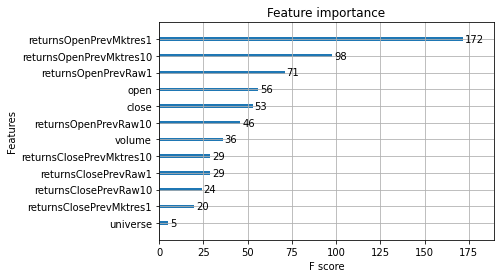

In [ ]:
from sklearn.metrics import mean_squared_error
import math
print("test set RMSE: ",math.sqrt(mean_squared_error(y_test, y_pred_test)))
#print("validation set RMSE: ",math.sqrt(mean_squared_error(y_validate, y_pred_val)))
print(xgb_reg.feature_importances_)
print(X_train.columns)

from xgboost import plot_importance
from matplotlib import pyplot
plot_importance(xgb_reg)
pyplot.show()

In [ ]:
explainer = shap.TreeExplainer(xgb_reg)

In [ ]:
shap_values = explainer.shap_values(X_train,check_additivity=False) # worked

# visualize the first prediction's explanation
#shap.plots.waterfall(shap_values[0])

AttributeError: ignored

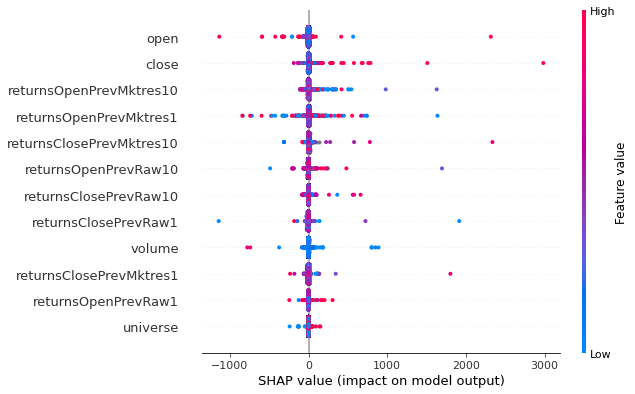

In [ ]:
shap.summary_plot(shap_values, X_train)

In [ ]:
shap.force_plot(explainer.expected_value, shap_values)

[23:53:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


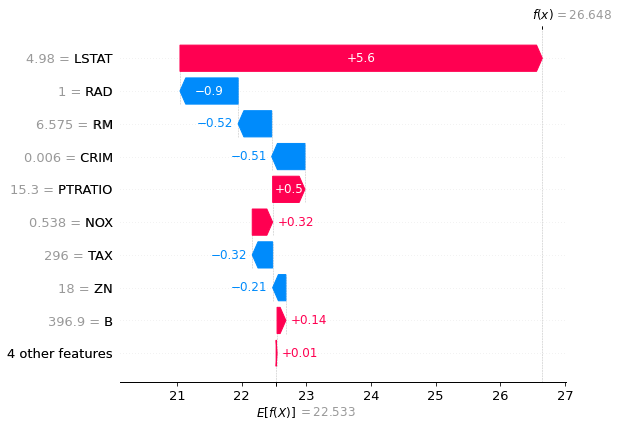

In [ ]:
# train an XGBoost model
X, y = shap.datasets.boston()
model = xgboost.XGBRegressor().fit(X, y)

# explain the model's predictions using SHAP
# (same syntax works for LightGBM, CatBoost, scikit-learn, transformers, Spark, etc.)
explainer = shap.Explainer(model)
shap_values = explainer(X)

# visualize the first prediction's explanation
shap.plots.waterfall(shap_values[0])

### **XGBoost: nested CV**

In [1]:
from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
import numpy as np
import pandas as pd
from datetime import datetime
from datetime import timedelta 
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
import seaborn as sns
import pickle
from matplotlib import pyplot
import math

import xgboost as xgboost
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import ParameterGrid
from sklearn.metrics import mean_squared_error
from xgboost import plot_importance

In [3]:
path = "./gdrive/MyDrive/Colab Datasets/twosigma_data/"

df = pd.read_csv(path+"market_train_full.csv")
df['time'] = pd.to_datetime(df['time'])
#df['quarter'] = pd.PeriodIndex(df['time'], freq= 'Q')
df['quarter'] = df['time'].dt.to_period("Q")
#.dt.date
#df['time'].head()
df.head()

/usr/local/lib/python3.7/dist-packages/pandas/core/arrays/datetimes.py:1092: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  UserWarning,


,Unnamed: 0,time,assetCode,assetName,volume,close,open,returnsClosePrevRaw1,returnsOpenPrevRaw1,returnsClosePrevMktres1,returnsOpenPrevMktres1,returnsClosePrevRaw10,returnsOpenPrevRaw10,returnsClosePrevMktres10,returnsOpenPrevMktres10,returnsOpenNextMktres10,universe,quarter
0,0,2007-02-01 22:00:00+00:00,A.N,Agilent Technologies Inc,2606900.0,32.19,32.17,0.005938,0.005312,NaN,NaN,-0.001860,0.000622,NaN,NaN,0.034672,1.0,2007Q1
1,1,2007-02-01 22:00:00+00:00,AAI.N,AirTran Holdings Inc,2051600.0,11.12,11.08,0.004517,-0.007168,NaN,NaN,-0.078708,-0.088066,NaN,NaN,0.027803,0.0,2007Q1
2,2,2007-02-01 22:00:00+00:00,AAP.N,Advance Auto Parts Inc,1164800.0,37.51,37.99,-0.011594,0.025648,NaN,NaN,0.014332,0.045405,NaN,NaN,0.024433,1.0,2007Q1
3,3,2007-02-01 22:00:00+00:00,AAPL.O,Apple Inc,23747329.0,84.74,86.23,-0.011548,0.016324,NaN,NaN,-0.048613,-0.037182,NaN,NaN,-0.007425,1.0,2007Q1
4,4,2007-02-01 22:00:00+00:00,ABB.N,ABB Ltd,1208600.0,18.02,18.01,0.011791,0.025043,NaN,NaN,0.012929,0.020397,NaN,NaN,-0.017994,1.0,2007Q1


In [35]:
# 2007-02-01 to 2008-02-01: 1 year of data
sample = df[df['time'] < '2008-08-02']
print(sample.info())
print(sample['time'].min())
print(sample['time'].max())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 565437 entries, 0 to 565436
Data columns (total 18 columns):
 #   Column                    Non-Null Count   Dtype              
---  ------                    --------------   -----              
 0   Unnamed: 0                565437 non-null  int64              
 1   time                      565437 non-null  datetime64[ns, UTC]
 2   assetCode                 565437 non-null  object             
 3   assetName                 565437 non-null  object             
 4   volume                    565437 non-null  float64            
 5   close                     565437 non-null  float64            
 6   open                      565437 non-null  float64            
 7   returnsClosePrevRaw1      565437 non-null  float64            
 8   returnsOpenPrevRaw1       565437 non-null  float64            
 9   returnsClosePrevMktres1   561988 non-null  float64            
 10  returnsOpenPrevMktres1    561988 non-null  float64            
 11  

Use nested approach to split data: \\
train = Q1, validation = Q2, test = Q3 \\
train = Q1+Q2, validation = Q3, test = Q4

In [36]:
data = sample
time_list = data['quarter'].unique()
# print(time_list)

splits = {'train': [],'validate':[], 'test': []}
for i in range(1,len(time_list)-2):
  #print(i)
  # print(time_list[:i])
  # print(time_list[i+1])
  # print(time_list[i+2])
  train_qtr = (time_list[:i])
  validate_qtr = time_list[i]
  test_qtr = time_list[i+1]
  splits['train'].append(data.loc[data.quarter.isin(train_qtr), :])
  splits['validate'].append(data.loc[data.quarter == validate_qtr, :])
  splits['test'].append(data.loc[data.quarter == test_qtr, :])

In [37]:
print("train",splits['train'][0]['quarter'].unique())
print("validate",splits['validate'][0]['quarter'].unique())
print("test",splits['test'][0]['quarter'].unique())
print(len(splits['validate']))

print("train",splits['train'][1]['quarter'].unique())
print("validate",splits['validate'][1]['quarter'].unique())
print("test",splits['test'][1]['quarter'].unique())

print("train",splits['train'][2]['quarter'].unique())
print("validate",splits['validate'][2]['quarter'].unique())
print("test",splits['test'][2]['quarter'].unique())

print("train",splits['train'][3]['quarter'].unique())
print("validate",splits['validate'][3]['quarter'].unique())
print("test",splits['test'][3]['quarter'].unique())

train <PeriodArray>
['2007Q1']
Length: 1, dtype: period[Q-DEC]
validate <PeriodArray>
['2007Q2']
Length: 1, dtype: period[Q-DEC]
test <PeriodArray>
['2007Q3']
Length: 1, dtype: period[Q-DEC]
4
train <PeriodArray>
['2007Q1', '2007Q2']
Length: 2, dtype: period[Q-DEC]
validate <PeriodArray>
['2007Q3']
Length: 1, dtype: period[Q-DEC]
test <PeriodArray>
['2007Q4']
Length: 1, dtype: period[Q-DEC]
train <PeriodArray>
['2007Q1', '2007Q2', '2007Q3']
Length: 3, dtype: period[Q-DEC]
validate <PeriodArray>
['2007Q4']
Length: 1, dtype: period[Q-DEC]
test <PeriodArray>
['2008Q1']
Length: 1, dtype: period[Q-DEC]
train <PeriodArray>
['2007Q1', '2007Q2', '2007Q3', '2007Q4']
Length: 4, dtype: period[Q-DEC]
validate <PeriodArray>
['2008Q1']
Length: 1, dtype: period[Q-DEC]
test <PeriodArray>
['2008Q2']
Length: 1, dtype: period[Q-DEC]


In [ ]:
# Tune hyperparameters on training set & evaluate performance on validation set
hyperparameters_list = [[]] * len(splits['train'])
rmse_list = [[]] * len(splits['train'])

for i in range(0,len(splits['train'])):
  X_train = splits['train'][i].drop(['Unnamed: 0','time','assetCode','assetName','returnsOpenNextMktres10','quarter'], axis=1)
  X_train['universe'] = X_train['universe'].astype(int)
  y_train = splits['train'][i]['returnsOpenNextMktres10']

  X_validate = splits['validate'][i].drop(['Unnamed: 0','time','assetCode','assetName','returnsOpenNextMktres10','quarter'], axis=1)
  X_validate['universe'] = X_validate['universe'].astype(int)
  y_validate = splits['validate'][i]['returnsOpenNextMktres10']

  # X_test = splits['test'][i].drop(['Unnamed: 0','time','assetCode','assetName','returnsOpenNextMktres10','quarter'], axis=1)
  # X_test['universe'] = X_test['universe'].astype(int)
  # y_test = splits['test'][i]['returnsOpenNextMktres10']

  # data_dmatrix = xgboost.DMatrix(data=X_train,label=y_train)

  ### hyperparameters
  hyperparas_xgb = {"objective": ['reg:squarederror'], 
                    "n_estimators": [20,50,100], 
                    "learning_rate":[0.5,1],
                    'gamma': [0.5, 1, 1.5, 2, 5],
                    "max_depth": [3,4,5, 6], 
                    "colsample_bylevel": [0.8, 1]}
  hyperparas_xgb_list = list(ParameterGrid(hyperparas_xgb))

  seed = 12345
  for hyperpara in hyperparas_xgb_list:
      #print("hyperparamaters: " + str(hyperpara) + "\n")
      hyperparameters_list[i].append(str(hyperpara))
      model = XGBRegressor(**hyperpara, seed = seed)
      model.fit(X_train, y_train, eval_metric='rmse', verbose=False)
      # , eval_set=[(X_validate, y_validate)]
      #print("Performance (validate set): \n")
      y_pred_validate = model.predict(X_validate)
      print("RMSE : %.4f" % math.sqrt(mean_squared_error(y_validate, y_pred_validate)))
      rmse_list[i].append(math.sqrt(mean_squared_error(y_validate, y_pred_validate)))
  
f1 = open("rmse_list.pkl", "wb")
pickle.dump(rmse_list, f1)
f1.close()

f2 = open("hyperparameters_list.pkl", "wb")
pickle.dump(hyperparameters_list, f2)
f2.close()

!cp "rmse_list.pkl" "./gdrive/MyDrive/Colab Datasets/twosigma_data/modeling_results/"
!cp "hyperparameters_list.pkl" "./gdrive/MyDrive/Colab Datasets/twosigma_data/modeling_results/"

In [9]:
f1 = open("rmse_list.pkl", "wb")
pickle.dump(rmse_list, f1)
f1.close()

f2 = open("hyperparameters_list.pkl", "wb")
pickle.dump(hyperparameters_list, f2)
f2.close()

!cp "rmse_list.pkl" "./gdrive/MyDrive/Colab Datasets/twosigma_data/modeling_results/"
!cp "hyperparameters_list.pkl" "./gdrive/MyDrive/Colab Datasets/twosigma_data/modeling_results/"

In [8]:
print(min(rmse_list[3]))
print(hyperparameters_list[0][0:3])

0.18298932614912936
["{'colsample_bylevel': 0.8, 'gamma': 0.5, 'learning_rate': 0.5, 'max_depth': 3, 'n_estimators': 20, 'objective': 'reg:squarederror'}", "{'colsample_bylevel': 0.8, 'gamma': 0.5, 'learning_rate': 0.5, 'max_depth': 3, 'n_estimators': 50, 'objective': 'reg:squarederror'}", "{'colsample_bylevel': 0.8, 'gamma': 0.5, 'learning_rate': 0.5, 'max_depth': 3, 'n_estimators': 100, 'objective': 'reg:squarederror'}"]


In [11]:
open_file = open("./gdrive/MyDrive/Colab Datasets/twosigma_data/modeling_results/rmse_list.pkl", "rb")
rmse_list = pickle.load(open_file)
open_file.close()

open_file = open("./gdrive/MyDrive/Colab Datasets/twosigma_data/modeling_results/hyperparameters_list.pkl", "rb")
hyperparameters_list = pickle.load(open_file)
open_file.close()

In [70]:
# !cp "rmse_list.pkl" "./gdrive/MyDrive/Colab Datasets/twosigma_data/modeling_results/"
# !cp "hyperparameters_list.pkl" "./gdrive/MyDrive/Colab Datasets/twosigma_data/modeling_results/"

In [19]:
for i in range(0,len(splits['train'])):
  min_index = rmse_list[i].index(min(rmse_list[i]))
  print("RMSE: ",rmse_list[i][min_index])
  print("parameters: ",hyperparameters_list[i][min_index])

RMSE:  0.18298932614912936
parameters:  {'colsample_bylevel': 0.8, 'gamma': 1, 'learning_rate': 0.5, 'max_depth': 6, 'n_estimators': 20, 'objective': 'reg:squarederror'}
RMSE:  0.18298932614912936
parameters:  {'colsample_bylevel': 0.8, 'gamma': 1, 'learning_rate': 0.5, 'max_depth': 6, 'n_estimators': 20, 'objective': 'reg:squarederror'}
RMSE:  0.18298932614912936
parameters:  {'colsample_bylevel': 0.8, 'gamma': 1, 'learning_rate': 0.5, 'max_depth': 6, 'n_estimators': 20, 'objective': 'reg:squarederror'}
RMSE:  0.18298932614912936
parameters:  {'colsample_bylevel': 0.8, 'gamma': 1, 'learning_rate': 0.5, 'max_depth': 6, 'n_estimators': 20, 'objective': 'reg:squarederror'}


In [41]:
params= {'colsample_bylevel': 0.8, 
        'learning_rate': 0.5, 
        'max_depth': 6, 
        'n_estimators': 50, 
        'objective': 'reg:squarederror'}

# min_index = rmse_list.index(min(rmse_list))
# params = hyperparameters_list[min_index]
# models = []
for i in range(0,len(splits['train'])):
  X_train = splits['train'][i].drop(['Unnamed: 0','time','assetCode','assetName','returnsOpenNextMktres10','quarter'], axis=1)
  X_train['universe'] = X_train['universe'].astype(int)
  y_train = splits['train'][i]['returnsOpenNextMktres10']

  # X_validate = splits['validate'][i].drop(['Unnamed: 0','time','assetCode','assetName','returnsOpenNextMktres10','quarter'], axis=1)
  # X_validate['universe'] = X_validate['universe'].astype(int)
  # y_validate = splits['validate'][i]['returnsOpenNextMktres10']

  X_test = splits['test'][i].drop(['Unnamed: 0','time','assetCode','assetName','returnsOpenNextMktres10','quarter'], axis=1)
  X_test['universe'] = X_test['universe'].astype(int)
  y_test = splits['test'][i]['returnsOpenNextMktres10']

  # data_dmatrix = xgboost.DMatrix(data=X_train,label=y_train)
  # data_dmatrix = xgboost.DMatrix(data=X_test,label=y_test)

  # instantiate the classifier 
  xgb_reg = XGBRegressor(**params)
  xgb_reg.fit(X_train, y_train)
  y_pred_test = xgb_reg.predict(X_test)
  print(i,"RMSE : %.4f" % math.sqrt(mean_squared_error(y_test, y_pred_test)))
  #plot_importance(xgb_reg)
  model_name = "model_"+str(i)+".json"
  xgb_reg.save_model(model_name)

0 RMSE : 26.8518
1 RMSE : 32.6680
2 RMSE : 27.6991
3 RMSE : 26.9872


In [ ]:
i = 0
X_train = splits['train'][i].drop(['Unnamed: 0','time','assetCode','assetName','returnsOpenNextMktres10','quarter'], axis=1)
X_train['universe'] = X_train['universe'].astype(int)
y_train = splits['train'][i]['returnsOpenNextMktres10']

X_validate = splits['validate'][i].drop(['Unnamed: 0','time','assetCode','assetName','returnsOpenNextMktres10','quarter'], axis=1)
X_validate['universe'] = X_validate['universe'].astype(int)
y_validate = splits['validate'][i]['returnsOpenNextMktres10']

# X_test = splits['test'][0].drop(['Unnamed: 0','time','assetCode','assetName','returnsOpenNextMktres10'], axis=1)
# X_test['universe'] = X_test['universe'].astype(int)
# y_test = splits['test'][0]['returnsOpenNextMktres10']

data_dmatrix = xgboost.DMatrix(data=X_train,label=y_train)
params= {'colsample_bylevel': 0.8, 
        'learning_rate': 1, 
        'max_depth': 3, 
        'n_estimators': 100, 
        'objective': 'reg:squarederror'}

# instantiate the classifier 
xgb_reg = XGBRegressor(**params)
xgb_reg.fit(X_train, y_train)
y_pred_validate = xgb_reg.predict(X_validate)
print(i,"RMSE : %.4f" % math.sqrt(mean_squared_error(y_validate, y_pred_validate)))

0 RMSE : 27.0135


### Model Validation

### Random Forest

In [4]:
from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [5]:
import numpy as np
import pandas as pd
from datetime import datetime
from datetime import timedelta 
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
import seaborn as sns
import pickle
from matplotlib import pyplot
import math

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from pprint import pprint

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import ParameterGrid
from sklearn.metrics import mean_squared_error

In [6]:
path = "./gdrive/MyDrive/Colab Datasets/twosigma_data/"

df = pd.read_csv(path+"market_train_full.csv")
df['time'] = pd.to_datetime(df['time'])
#df['quarter'] = pd.PeriodIndex(df['time'], freq= 'Q')
df['quarter'] = df['time'].dt.to_period("Q")
df.head()

/usr/local/lib/python3.7/dist-packages/pandas/core/arrays/datetimes.py:1092: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  UserWarning,


,Unnamed: 0,time,assetCode,assetName,volume,close,open,returnsClosePrevRaw1,returnsOpenPrevRaw1,returnsClosePrevMktres1,returnsOpenPrevMktres1,returnsClosePrevRaw10,returnsOpenPrevRaw10,returnsClosePrevMktres10,returnsOpenPrevMktres10,returnsOpenNextMktres10,universe,quarter
0,0,2007-02-01 22:00:00+00:00,A.N,Agilent Technologies Inc,2606900.0,32.19,32.17,0.005938,0.005312,NaN,NaN,-0.001860,0.000622,NaN,NaN,0.034672,1.0,2007Q1
1,1,2007-02-01 22:00:00+00:00,AAI.N,AirTran Holdings Inc,2051600.0,11.12,11.08,0.004517,-0.007168,NaN,NaN,-0.078708,-0.088066,NaN,NaN,0.027803,0.0,2007Q1
2,2,2007-02-01 22:00:00+00:00,AAP.N,Advance Auto Parts Inc,1164800.0,37.51,37.99,-0.011594,0.025648,NaN,NaN,0.014332,0.045405,NaN,NaN,0.024433,1.0,2007Q1
3,3,2007-02-01 22:00:00+00:00,AAPL.O,Apple Inc,23747329.0,84.74,86.23,-0.011548,0.016324,NaN,NaN,-0.048613,-0.037182,NaN,NaN,-0.007425,1.0,2007Q1
4,4,2007-02-01 22:00:00+00:00,ABB.N,ABB Ltd,1208600.0,18.02,18.01,0.011791,0.025043,NaN,NaN,0.012929,0.020397,NaN,NaN,-0.017994,1.0,2007Q1


In [57]:
# unique number of asset codes: 3780
print("unique number of asset codes: ",df['assetCode'].nunique())
aapl = df[df['assetCode']=="AAPL.O"]
(aapl.head(20))


unique number of asset codes:  3780


,Unnamed: 0,time,assetCode,assetName,volume,close,open,returnsClosePrevRaw1,returnsOpenPrevRaw1,returnsClosePrevMktres1,returnsOpenPrevMktres1,returnsClosePrevRaw10,returnsOpenPrevRaw10,returnsClosePrevMktres10,returnsOpenPrevMktres10,returnsOpenNextMktres10,universe,quarter
3,3,2007-02-01 22:00:00+00:00,AAPL.O,Apple Inc,23747329.0,84.74,86.230,-0.011548,0.016324,NaN,NaN,-0.048613,-0.037182,NaN,NaN,-0.007425,1.0,2007Q1
1421,1421,2007-02-02 22:00:00+00:00,AAPL.O,Apple Inc,22212416.0,84.75,84.120,0.000118,-0.024469,-0.001091,-0.026983,-0.042373,-0.050779,NaN,NaN,-0.009770,1.0,2007Q1
2844,2844,2007-02-05 22:00:00+00:00,AAPL.O,Apple Inc,20737742.0,83.94,84.300,-0.009558,0.002140,-0.008843,0.001477,-0.032838,-0.054297,NaN,NaN,0.005037,1.0,2007Q1
4272,4272,2007-02-06 22:00:00+00:00,AAPL.O,Apple Inc,30893975.0,84.15,84.450,0.002502,0.001779,0.002006,0.002135,-0.018086,-0.014931,NaN,NaN,0.057268,1.0,2007Q1
5702,5702,2007-02-07 22:00:00+00:00,AAPL.O,Apple Inc,38180972.0,86.15,84.495,0.023767,0.000533,0.022779,0.000392,-0.006344,-0.025039,NaN,NaN,0.034650,1.0,2007Q1
7134,7134,2007-02-08 22:00:00+00:00,AAPL.O,Apple Inc,24264750.0,86.18,85.430,0.000348,0.011066,0.001591,0.010226,-0.000812,-0.019297,NaN,NaN,0.041006,1.0,2007Q1
8562,8562,2007-02-09 22:00:00+00:00,AAPL.O,Apple Inc,30756328.0,83.27,85.880,-0.033767,0.005267,-0.024615,0.006735,-0.024713,-0.013497,NaN,NaN,0.011036,1.0,2007Q1
9994,9994,2007-02-12 22:00:00+00:00,AAPL.O,Apple Inc,25873256.0,84.88,84.440,0.019335,-0.016768,0.023276,-0.009432,-0.012334,-0.021553,NaN,NaN,0.010912,1.0,2007Q1
11428,11428,2007-02-13 22:00:00+00:00,AAPL.O,Apple Inc,21250545.0,84.63,85.160,-0.002945,0.008527,-0.012278,0.012093,-0.010754,-0.014694,NaN,NaN,-0.001262,1.0,2007Q1
12860,12860,2007-02-14 22:00:00+00:00,AAPL.O,Apple Inc,18150679.0,85.30,84.630,0.007917,-0.006224,-0.001869,-0.012470,-0.005016,-0.002534,NaN,NaN,-0.002896,1.0,2007Q1


In [13]:
(84.75-84.74)/84.74

0.00011800802454572949

In [7]:
# 2007-02-01 to 2008-02-01: 1 year of data
sample = df[df['time'] < '2008-08-02']
print(sample.info())
print(sample['time'].min())
print(sample['time'].max())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 565437 entries, 0 to 565436
Data columns (total 18 columns):
 #   Column                    Non-Null Count   Dtype              
---  ------                    --------------   -----              
 0   Unnamed: 0                565437 non-null  int64              
 1   time                      565437 non-null  datetime64[ns, UTC]
 2   assetCode                 565437 non-null  object             
 3   assetName                 565437 non-null  object             
 4   volume                    565437 non-null  float64            
 5   close                     565437 non-null  float64            
 6   open                      565437 non-null  float64            
 7   returnsClosePrevRaw1      565437 non-null  float64            
 8   returnsOpenPrevRaw1       565437 non-null  float64            
 9   returnsClosePrevMktres1   561988 non-null  float64            
 10  returnsOpenPrevMktres1    561988 non-null  float64            
 11  

In [8]:
data = sample
time_list = data['quarter'].unique()
# print(time_list)

splits = {'train': [],'validate':[], 'test': []}
for i in range(1,len(time_list)-2):
  train_qtr = (time_list[:i])
  validate_qtr = time_list[i]
  test_qtr = time_list[i+1]
  splits['train'].append(data.loc[data.quarter.isin(train_qtr), :])
  splits['validate'].append(data.loc[data.quarter == validate_qtr, :])
  splits['test'].append(data.loc[data.quarter == test_qtr, :])

In [ ]:
print("train",splits['train'][0]['quarter'].unique())
print("validate",splits['validate'][0]['quarter'].unique())
print("test",splits['test'][0]['quarter'].unique())
print(len(splits['validate']))

print("train",splits['train'][1]['quarter'].unique())
print("validate",splits['validate'][1]['quarter'].unique())
print("test",splits['test'][1]['quarter'].unique())

print("train",splits['train'][2]['quarter'].unique())
print("validate",splits['validate'][2]['quarter'].unique())
print("test",splits['test'][2]['quarter'].unique())

print("train",splits['train'][3]['quarter'].unique())
print("validate",splits['validate'][3]['quarter'].unique())
print("test",splits['test'][3]['quarter'].unique())

In [45]:
X_train.isna().sum()

volume                          0
close                           0
open                            0
returnsClosePrevRaw1            0
returnsOpenPrevRaw1             0
returnsClosePrevMktres1      1648
returnsOpenPrevMktres1       1648
returnsClosePrevRaw10           0
returnsOpenPrevRaw10            0
returnsClosePrevMktres10    15384
returnsOpenPrevMktres10     15384
universe                        0
dtype: int64

In [66]:
# Tune hyperparameters on training set & evaluate performance on validation set
hyperparameters_list = [[]] * len(splits['train'])
rmse_list = [[]] * len(splits['train'])
#i = 0
for i in range(0,len(splits['train'])):
  X_train = splits['train'][i].drop(['Unnamed: 0','time','assetCode','assetName',
                                    'returnsOpenNextMktres10','quarter','returnsClosePrevMktres1','returnsOpenPrevMktres1',
                                    'returnsClosePrevMktres10','returnsOpenPrevMktres10'], axis=1)
  X_train['universe'] = X_train['universe'].astype(int)
  y_train = splits['train'][i]['returnsOpenNextMktres10']

  X_validate = splits['validate'][i].drop(['Unnamed: 0','time','assetCode','assetName',
                                    'returnsOpenNextMktres10','quarter','returnsClosePrevMktres1','returnsOpenPrevMktres1',
                                    'returnsClosePrevMktres10','returnsOpenPrevMktres10'], axis=1)
  X_validate['universe'] = X_validate['universe'].astype(int)
  y_validate = splits['validate'][i]['returnsOpenNextMktres10']


  ### hyperparameters
  hyperparas_rf = {'bootstrap': [True],
                  'max_depth': [10,20,30],
                  'max_features': ['auto', 'sqrt'],
                  'min_samples_leaf': [3, 4, 5],
                  'min_samples_split': [8, 10, 12],
                  'n_estimators': [1, 2,3,4]
                    }
  hyperparas_rf_list = list(ParameterGrid(hyperparas_rf))

  for hyperpara in hyperparas_rf_list:
      hyperparameters_list[i].append(str(hyperpara))
      model = RandomForestRegressor(**hyperpara)
      model.fit(X_train, y_train)
      y_pred_validate = model.predict(X_validate)
      #print("RMSE : %.4f" % math.sqrt(mean_squared_error(y_validate, y_pred_validate)))
      rmse_list[i].append(math.sqrt(mean_squared_error(y_validate, y_pred_validate)))

In [67]:
len(hyperparameters_list)

len(hyperparameters_list[0])
len(rmse_list[0])
for i in range(0,len(splits['train'])):
  min_index = rmse_list[i].index(min(rmse_list[i]))
  print("RMSE: ",rmse_list[i][min_index])
  print("parameters: ",hyperparameters_list[i][min_index])

RMSE:  2.9925868274228122
parameters:  {'bootstrap': True, 'max_depth': 30, 'max_features': 'sqrt', 'min_samples_leaf': 3, 'min_samples_split': 10, 'n_estimators': 4}
RMSE:  2.9925868274228122
parameters:  {'bootstrap': True, 'max_depth': 30, 'max_features': 'sqrt', 'min_samples_leaf': 3, 'min_samples_split': 10, 'n_estimators': 4}
RMSE:  2.9925868274228122
parameters:  {'bootstrap': True, 'max_depth': 30, 'max_features': 'sqrt', 'min_samples_leaf': 3, 'min_samples_split': 10, 'n_estimators': 4}
RMSE:  2.9925868274228122
parameters:  {'bootstrap': True, 'max_depth': 30, 'max_features': 'sqrt', 'min_samples_leaf': 3, 'min_samples_split': 10, 'n_estimators': 4}


In [69]:
f1 = open("rmse_list_val_rf.pkl", "wb")
pickle.dump(rmse_list, f1)
f1.close()

f2 = open("hyperparameters_list_val_rf.pkl", "wb")
pickle.dump(hyperparameters_list, f2)
f2.close()

!cp "rmse_list_val_rf.pkl" "./gdrive/MyDrive/Colab Datasets/twosigma_data/modeling_results/"
!cp "hyperparameters_list_val_rf.pkl" "./gdrive/MyDrive/Colab Datasets/twosigma_data/modeling_results/"

In [91]:
# use best parameters to train model on X_train & evaluate performance on X_test
rmse_list_test = [[]] * len(splits['train'])
models = [[]] * len(splits['train'])
for i in range(0,len(splits['train'])):
  X_train = splits['train'][i].drop(['Unnamed: 0','time','assetCode','assetName',
                                  'returnsOpenNextMktres10','quarter','returnsClosePrevMktres1','returnsOpenPrevMktres1',
                                  'returnsClosePrevMktres10','returnsOpenPrevMktres10'], axis=1)
  X_train['universe'] = X_train['universe'].astype(int)
  y_train = splits['train'][i]['returnsOpenNextMktres10']

  X_test = splits['test'][i].drop(['Unnamed: 0','time','assetCode','assetName',
                                    'returnsOpenNextMktres10','quarter','returnsClosePrevMktres1','returnsOpenPrevMktres1',
                                    'returnsClosePrevMktres10','returnsOpenPrevMktres10'], axis=1)
  X_test['universe'] = X_test['universe'].astype(int)
  y_test = splits['test'][i]['returnsOpenNextMktres10']

  min_index = rmse_list[i].index(min(rmse_list[i]))
  #print("RMSE: ",rmse_list[i][min_index])
  print("parameters: ",hyperparameters_list[i][min_index])

  #model = RandomForestRegressor(bootstrap=True,max_depth=30,max_features='sqrt',min_samples_leaf=3,min_samples_split=10,n_estimators=4)
  #model.fit(X_train, y_train)
  models[i] = RandomForestRegressor(bootstrap=True,max_depth=30,max_features='sqrt',min_samples_leaf=3,min_samples_split=10,n_estimators=4)
  models[i].fit(X_train, y_train)
  y_pred_test = models[i].predict(X_test)
  print("RMSE : %.4f" % math.sqrt(mean_squared_error(y_test, y_pred_test)))
  rmse_list_test[i].append(math.sqrt(mean_squared_error(y_test, y_pred_test)))

parameters:  {'bootstrap': True, 'max_depth': 30, 'max_features': 'sqrt', 'min_samples_leaf': 3, 'min_samples_split': 10, 'n_estimators': 4}
RMSE : 26.8777
parameters:  {'bootstrap': True, 'max_depth': 30, 'max_features': 'sqrt', 'min_samples_leaf': 3, 'min_samples_split': 10, 'n_estimators': 4}
RMSE : 16.2800
parameters:  {'bootstrap': True, 'max_depth': 30, 'max_features': 'sqrt', 'min_samples_leaf': 3, 'min_samples_split': 10, 'n_estimators': 4}
RMSE : 7.8030
parameters:  {'bootstrap': True, 'max_depth': 30, 'max_features': 'sqrt', 'min_samples_leaf': 3, 'min_samples_split': 10, 'n_estimators': 4}
RMSE : 6.9361


Text(0.5, 0, 'Random Forest Feature Importance')

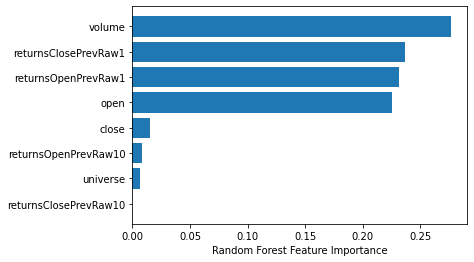

In [109]:
# feature importance plots
i = 0
sorted_idx = models[i].feature_importances_.argsort()
names = list(X_train.columns)
sorted_names = [x for _,x in sorted(zip(sorted_idx,names))]

plt.barh(sorted_names, models[i].feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")


### Neural Network


In [9]:
!pip install yfinance

     |████████████████████████████████| 6.3MB 6.7MB/s 
  Created wheel for yfinance: filename=yfinance-0.1.59-py2.py3-none-any.whl size=23455 sha256=77052afca1b18696a987e83d30bc7af2ea523c8b2a8988ad161f174a36919fac
  Stored in directory: /root/.cache/pip/wheels/f8/2a/0f/4b5a86e1d52e451757eb6bc17fd899629f0925c777741b6d04
Successfully built yfinance
  Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


In [41]:
import yfinance as yf
from keras.models import Sequential
from keras.layers import Dense
from keras.preprocessing.sequence import TimeseriesGenerator
import numpy as np

# create the object that represents Maersk stock data
# here MAERSK-B.CO -- is the Maerks's ticker
maersk = yf.Ticker('MAERSK-B.CO')
history = maersk.history(period='max', interval='1d')
print(history.info())
(history.head())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5431 entries, 2000-01-03 to 2021-06-22
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          5431 non-null   float64
 1   High          5431 non-null   float64
 2   Low           5431 non-null   float64
 3   Close         5431 non-null   float64
 4   Volume        5431 non-null   int64  
 5   Dividends     5431 non-null   float64
 6   Stock Splits  5431 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 339.4 KB
None


,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2000-01-03,4481.085449,4623.342083,4445.521291,4481.085449,2976,0.0,0.0
2000-01-04,4409.956623,4409.956623,4267.700006,4321.046387,2615,0.0,0.0
2000-01-05,4161.008109,4267.700586,4129.000396,4178.790039,3682,0.0,0.0
2000-01-06,4161.007435,4249.917669,4125.443282,4214.353516,2752,0.0,0.0
2000-01-07,4214.354002,4303.264545,4200.768518,4232.136230,5075,0.0,0.0


In [11]:
def generate_series(data, value_num):
    close = data['Close']
    dividends = data['Dividends']
    tsg = TimeseriesGenerator(close, close,
                              length=value_num,
                              batch_size=len(close))
    global_index = value_num
    i, t = tsg[0]
    has_dividends = np.zeros(len(i))
    for b_row in range(len(t)):
        assert(abs(t[b_row] - close[global_index]) <= 0.001)
        has_dividends[b_row] = dividends[global_index] > 0            
        global_index += 1
    #return np.concatenate((i, np.transpose([has_dividends])),
    #                       axis=1), t
    return i,t
                        

In [33]:
inputs, targets = generate_series(history, 4)
print(inputs[0])

[4481.08544922 4321.04638672 4178.79003906 4214.35351562]


In [46]:
# normalized ([0,1]) & re-generate inputs & targets
h_min = history.min()
normalized_h = (history - h_min) / (history.max() - h_min)

inputs, targets = generate_series(normalized_h, 4)
print(inputs[0])

[0.15788437 0.14821565 0.13962127 0.14176983]


In [44]:
# create NN model
def create_model(n):
    m = Sequential()
    m.add(Dense(64, activation='relu', input_shape=(n+1,)))
    m.add(Dense(64, activation='relu'))
    m.add(Dense(1))
    return m

def select_inputs(data, start, end, epochs):
    models = {}
    for inputs in range(start, end+1):
        print('Using {} inputs'.format(inputs))
        model_inputs, targets = generate_series(data, inputs)
        
        train_inputs = model_inputs[:-1000]
        val_inputs = model_inputs[-1000:]
        train_targets = targets[:-1000]
        val_targets = targets[-1000:]
        
        m = create_model(inputs)
        print('Training')
        m.compile(optimizer='adam', loss='mse') 
        h = m.fit(train_inputs, train_targets,
                  epochs=epochs,
                  batch_size=32,
                  validation_data=(val_inputs, val_targets))
        model_info = {'model': m, 'history': h.history}
        models[inputs] = model_info
    return models
  
train_inputs = inputs[:-1000]
val_inputs = inputs[-1000:]

train_targets = targets[:-1000]
val_targets = targets[-1000:]


train_inputs.shape
print(train_inputs[0:2])
print(train_targets[0:2])

[[0.15788437 0.14821565 0.13962127 0.14176983]
 [0.14821565 0.13962127 0.14176983 0.14284417]]
[0.14284417 0.14570177]


In [ ]:
#train networks with 2 to 10 inputs for 20 epochs:
trained_models = select_inputs(normalized_h, 2, 10, 20)

In [53]:
inputs = 2
data = normalized_h
models = []
#for inputs in range(start, end+1):
print('Using {} inputs'.format(inputs))
model_inputs, targets = generate_series(data, inputs)

train_inputs = model_inputs[:-1000]
val_inputs = model_inputs[-1000:]
train_targets = targets[:-1000]
val_targets = targets[-1000:]

print(train_inputs.shape)
print(train_inputs[0:2])

Using 2 inputs
(4429, 2)
[[0.15788437 0.14821565]
 [0.14821565 0.13962127]]


In [ ]:
epochs = 5
m = create_model(inputs)
print('Training')

m.compile(optimizer='adam', loss='mse') 
h = m.fit(train_inputs, train_targets,epochs=epochs,
          batch_size=32)
model_info = {'model': m, 'history': h.history}
#models[inputs] = model_info



##### NN regression keras

In [59]:
from pandas import read_csv
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
# load dataset
dataframe = df[df['assetCode']=="AAPL.O"]
dataset = dataframe.values
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2498 entries, 3 to 4071144
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype              
---  ------                    --------------  -----              
 0   Unnamed: 0                2498 non-null   int64              
 1   time                      2498 non-null   datetime64[ns, UTC]
 2   assetCode                 2498 non-null   object             
 3   assetName                 2498 non-null   object             
 4   volume                    2498 non-null   float64            
 5   close                     2498 non-null   float64            
 6   open                      2498 non-null   float64            
 7   returnsClosePrevRaw1      2498 non-null   float64            
 8   returnsOpenPrevRaw1       2498 non-null   float64            
 9   returnsClosePrevMktres1   2497 non-null   float64            
 10  returnsOpenPrevMktres1    2497 non-null   float64            
 11  returnsClosePr

In [74]:
# split into input (X) and output (Y) variables
X = dataset[:,4:8]
Y = dataset[:,15]
X = np.asarray(X).astype('float32')
Y = np.asarray(Y).astype('float32')
X[0:2]

array([[ 2.3747328e+07,  8.4739998e+01,  8.6230003e+01, -1.1547883e-02],
       [ 2.2212416e+07,  8.4750000e+01,  8.4120003e+01,  1.1800802e-04]],
      dtype=float32)

In [77]:
# create model
model = Sequential()
model.add(Dense(4, input_dim=4, kernel_initializer='normal', activation='relu'))
model.add(Dense(1, kernel_initializer='normal'))
# Compile model
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(X, Y,epochs=10,batch_size=5, verbose=0)

In [79]:
# predictions
predictions = model.predict(X)
print(predictions[0:3])
print(Y[0:3])

[[-0.01570572]
 [-0.01570572]
 [-0.01570572]]
[-0.00742461 -0.00977044  0.00503655]


### Portfolio Construction & Stock Selection

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pandas_datareader as web
from matplotlib.ticker import FuncFormatter

In [2]:
!pip install PyPortfolioOpt

     |████████████████████████████████| 61kB 3.3MB/s 
     |████████████████████████████████| 1.3MB 8.8MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for cvxpy: filename=cvxpy-1.1.13-cp37-cp37m-linux_x86_64.whl size=2736235 sha256=99f3a90afc6ab3f6b4261feeb4d36f1b7371e8390d7b24c44d6990bd12e5e5c7
  Stored in directory: /root/.cache/pip/wheels/f9/78/00/f29636789ee83434953b5442f16ec3f9834a68e7fd0393c220
Successfully built cvxpy
  Found existing installation: cvxpy 1.0.31
    Uninstalling cvxpy-1.0.31:
      Successfully uninstalled cvxpy-1.0.31


In [10]:
!pip install pulp

     |████████████████████████████████| 40.6MB 77kB/s 


In [3]:
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns
#from pypfopt.plotting import Plotting
from matplotlib.ticker import FuncFormatter

from google.colab import drive

drive.mount('/content/gdrive')

ModuleNotFoundError: ignored

In [2]:
path = "./gdrive/MyDrive/Colab Datasets/twosigma_data/"

df = pd.read_csv(path+"market_train_full.csv")
df['time'] = pd.to_datetime(df['time'])
df['quarter'] = df['time'].dt.to_period("Q")

df.head()

FileNotFoundError: ignored

In [5]:
df.head()
df['time'].min()
df['time'].max()

Timestamp('2016-12-30 22:00:00+0000', tz='UTC')

In [6]:
data = df[df['time'] < '2008-08-02']

print(data['time'].min())
print(data['time'].max())

data = data.pivot(index='time', columns='assetCode', values='close').dropna(axis=1, how='any').iloc[0:, 0:10]
print(data.head())
print(data.info())
#print(data.isna().sum())

2007-02-01 22:00:00+00:00
2008-08-01 22:00:00+00:00
assetCode                    A.N  AAP.N  AAPL.O  ...  ABV.N  ACF.N  ACH.N
time                                             ...                     
2007-02-01 22:00:00+00:00  32.19  37.51   84.74  ...  52.46  27.25  24.52
2007-02-02 22:00:00+00:00  31.61  37.49   84.75  ...  52.24  27.42  24.45
2007-02-05 22:00:00+00:00  31.83  37.52   83.94  ...  52.89  27.25  24.63
2007-02-06 22:00:00+00:00  32.00  37.97   84.15  ...  52.90  27.61  25.33
2007-02-07 22:00:00+00:00  32.57  38.33   86.15  ...  52.52  27.65  25.83

[5 rows x 10 columns]
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 379 entries, 2007-02-01 22:00:00+00:00 to 2008-08-01 22:00:00+00:00
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A.N     379 non-null    float64
 1   AAP.N   379 non-null    float64
 2   AAPL.O  379 non-null    float64
 3   ABB.N   379 non-null    float64
 4   ABC.N   379 non-null    fl

In [111]:
(31.61-32.19)/32.19

-0.018018018018017966

In [16]:
weights = np.array([0.1]*10)
weights

array([0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1])

In [14]:
returns = data.pct_change()
returns

assetCode,A.N,AAP.N,AAPL.O,ABB.N,ABC.N,ABD.N,ABT.N,ABV.N,ACF.N,ACH.N
time,,,,,,,,,,
2007-02-01 22:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007-02-02 22:00:00+00:00,-0.018018,-0.000533,0.000118,0.010544,-0.000764,0.020313,-0.003783,-0.004194,0.006239,-0.002855
2007-02-05 22:00:00+00:00,0.006960,0.000800,-0.009558,-0.007688,0.003249,-0.005392,-0.003228,0.012443,-0.006200,0.007362
2007-02-06 22:00:00+00:00,0.005341,0.011994,0.002502,0.017709,-0.001714,0.002502,-0.000762,0.000189,0.013211,0.028421
2007-02-07 22:00:00+00:00,0.017813,0.009481,0.023767,0.017945,0.001908,0.002496,-0.000191,-0.007183,0.001449,0.019739
...,...,...,...,...,...,...,...,...,...,...
2008-07-28 22:00:00+00:00,-0.010494,-0.005975,-0.047619,0.001922,-0.017303,-0.005952,-0.021073,-0.009506,-0.066823,-0.043561
2008-07-29 22:00:00+00:00,0.008373,0.047082,0.017358,0.020338,0.019537,0.043114,-0.004803,0.000349,0.085427,0.033267
2008-07-30 22:00:00+00:00,0.016053,0.001674,0.017825,0.005265,-0.001419,0.009185,0.016267,0.032269,0.010417,0.009582


In [15]:
cov_matrix_annual = returns.cov()*252
cov_matrix_annual

assetCode,A.N,AAP.N,AAPL.O,ABB.N,ABC.N,ABD.N,ABT.N,ABV.N,ACF.N,ACH.N
assetCode,,,,,,,,,,
A.N,0.078511,0.033354,0.041881,0.042450,0.023940,0.036909,0.018800,0.057104,0.056161,0.076578
AAP.N,0.033354,0.114413,0.043367,0.045568,0.028714,0.052402,0.016939,0.058109,0.085081,0.068415
AAPL.O,0.041881,0.043367,0.162503,0.056996,0.015745,0.052055,0.013469,0.065423,0.070344,0.100569
ABB.N,0.042450,0.045568,0.056996,0.110000,0.020489,0.048676,0.017903,0.079825,0.097188,0.123272
ABC.N,0.023940,0.028714,0.015745,0.020489,0.066209,0.023655,0.015529,0.028644,0.044605,0.041108
ABD.N,0.036909,0.052402,0.052055,0.048676,0.023655,0.192116,0.027940,0.059654,0.107465,0.074446
ABT.N,0.018800,0.016939,0.013469,0.017903,0.015529,0.027940,0.044371,0.030152,0.038625,0.026653
ABV.N,0.057104,0.058109,0.065423,0.079825,0.028644,0.059654,0.030152,0.172252,0.126317,0.137401
ACF.N,0.056161,0.085081,0.070344,0.097188,0.044605,0.107465,0.038625,0.126317,0.473360,0.146216


In [17]:
port_variance = np.dot(weights.T, np.dot(cov_matrix_annual, weights))
port_variance

0.06819911291206925

In [18]:
port_volatility = np.sqrt(port_variance)
port_volatility

0.26114959872086585

In [19]:
portfolioSimpleAnnualReturn = np.sum(returns.mean()*weights) * 252
portfolioSimpleAnnualReturn

0.02853997074737055

In [20]:
percent_var = str(round(port_variance, 2) * 100) + '%'
percent_vols = str(round(port_volatility, 2) * 100) + '%'
percent_ret = str(round(portfolioSimpleAnnualReturn, 2)*100)+'%'
print("Expected annual return : "+ percent_ret)
print('Annual volatility/standard deviation/risk : '+percent_vols)
print('Annual variance : '+percent_var)

Expected annual return : 3.0%
Annual volatility/standard deviation/risk : 26.0%
Annual variance : 7.000000000000001%


In [24]:
mu = expected_returns.mean_historical_return(data)#returns.mean() * 252
S = risk_models.sample_cov(data) #Get the sample covariance matrix
print(mu)
print(S)

assetCode
A.N       0.074631
AAP.N     0.078288
AAPL.O    0.506306
ABB.N     0.269982
ABC.N    -0.136253
ABD.N    -0.481986
ABT.N     0.039954
ABV.N     0.078049
ACF.N    -0.522195
ACH.N    -0.008993
dtype: float64
assetCode       A.N     AAP.N    AAPL.O  ...     ABV.N     ACF.N     ACH.N
assetCode                                ...                              
A.N        0.078511  0.033354  0.041881  ...  0.057104  0.056161  0.076578
AAP.N      0.033354  0.114413  0.043367  ...  0.058109  0.085081  0.068415
AAPL.O     0.041881  0.043367  0.162503  ...  0.065423  0.070344  0.100569
ABB.N      0.042450  0.045568  0.056996  ...  0.079825  0.097188  0.123272
ABC.N      0.023940  0.028714  0.015745  ...  0.028644  0.044605  0.041108
ABD.N      0.036909  0.052402  0.052055  ...  0.059654  0.107465  0.074446
ABT.N      0.018800  0.016939  0.013469  ...  0.030152  0.038625  0.026653
ABV.N      0.057104  0.058109  0.065423  ...  0.172252  0.126317  0.137401
ACF.N      0.056161  0.085081  0.07

In [25]:
ef = EfficientFrontier(mu, S)
# get 75.3% AAPL.O & 24.7% ABB.N
weights = ef.max_sharpe() #Maximize the Sharpe ratio, and get the raw weights
cleaned_weights = ef.clean_weights() 
print(cleaned_weights) #Note the weights may have some rounding error, meaning they may not add up exactly to 1 but should be close
ef.portfolio_performance(verbose=True) # expected annual return, annual volatility & sharpe ratio

OrderedDict([('A.N', 0.0), ('AAP.N', 0.0), ('AAPL.O', 0.75254), ('ABB.N', 0.24746), ('ABC.N', 0.0), ('ABD.N', 0.0), ('ABT.N', 0.0), ('ABV.N', 0.0), ('ACF.N', 0.0), ('ACH.N', 0.0)])
Expected annual return: 44.8%
Annual volatility: 34.6%
Sharpe Ratio: 1.24


(0.4478243821699665, 0.3463980186061869, 1.2350659045089736)

In [28]:
from pypfopt.discrete_allocation import DiscreteAllocation, get_latest_prices
latest_prices = get_latest_prices(data)
weights = cleaned_weights 
da = DiscreteAllocation(weights, latest_prices, total_portfolio_value=15000)
allocation, leftover = da.lp_portfolio()
print("Discrete allocation:", allocation)
print("Funds remaining: ${:.2f}".format(leftover))

Discrete allocation: {'AAPL.O': 72, 'ABB.N': 144}
Funds remaining: $6.72
